https://www.dps.texas.gov/crimereports/16/citCh6.pdf
https://oag.ca.gov/hatecrimes
https://www.crimemapping.com/map/agency/26

In [1]:
import pandas as pd
import numpy as np
import requests
import bs4
import json
import re
import matplotlib.pyplot as plt

In [2]:
offender2004 = pd.read_excel('2004/Table5.xls')
colsoff = ['Bias Motivation', 'Total Offenses', 'White', 'Black', 'American Indian Alaskan Native',
        'Asian/Pacific Islander', 'Multiple Races, Group','Unknown Race', 'Unknown Offender']

In [3]:
offender2004 = offender2004.drop([0, 1, 2, 32])

In [4]:
offender2004.columns = colsoff

In [5]:
offender2004 = offender2004.reset_index(drop=True)
hold2004 = offender2004['Bias Motivation'][28][:-1]
offender2004['Bias Motivation'][28] = hold2004
offender2004#.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

,Bias Motivation,Total Offenses,White,Black,American Indian Alaskan Native,Asian/Pacific Islander,"Multiple Races, Group",Unknown Race,Unknown Offender
0,Total,9035,3720,1068,41,61,190,852,3103
1,Single-Bias Incidents,9021,3712,1068,41,61,188,852,3099
2,Race:,4863,2234,594,27,33,128,432,1415
3,Anti-White,998,190,499,15,9,25,84,176
4,Anti-Black,3281,1802,63,7,19,88,292,1010
5,Anti-American Indian/Alaskan Native,97,55,3,4,0,3,9,23
6,Anti-Asian/Pacific Islander,252,99,16,1,5,8,34,89
7,"Anti-Multiple Races, Group",235,88,13,0,0,4,13,117
8,Religion:,1480,292,55,7,7,12,164,943
9,Anti-Jewish,1003,151,27,6,6,6,94,713


In [6]:
known_offender2004 = pd.read_excel('2004/Table9.xls')
known_offender2004 = known_offender2004.drop([0,8,9]).reset_index(drop=True)
known_offender2004['Table 9'][5] = known_offender2004['Table 9'][5][:-1]
#known_offender2004#.iloc[1:].set_index('Table 9').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
location2004 = pd.read_excel('2004/Table10.xls')
colsloc = ['Location', 'Total Incidents', 'Race', 'Religion', 'Sexual Orientation',
        'Ethnicity/National Origin', 'Disability','Multiple Bias Incidents']
location2004 = location2004.drop([0, 1, 2, 30]).reset_index(drop=True)
location2004.columns = colsloc
location2004.drop(columns=['Total Incidents'])#.iloc[1:].set_index('Location').plot(kind='bar')

,Location,Race,Religion,Sexual Orientation,Ethnicity/National Origin,Disability,Multiple Bias Incidents
0,Total,4042,1374,1197,972,57,7
1,Air/bus/train terminal,45,11,8,8,0,0
2,Bank/savings and loan,8,5,4,2,1,0
3,Bar/nightclub,78,5,40,17,0,0
4,Church/synagogue/temple,55,236,13,10,0,1
5,Commercial office building,85,33,24,25,2,0
6,Construction site,13,3,0,7,0,0
7,Convenience store,43,11,10,31,3,0
8,Department/discount store,38,9,10,5,1,0
9,Drug store/Dr.'s office/hospital,27,18,7,7,0,0


In [8]:
offender2005 = pd.read_excel('2005/Table5.xls')
offender2005 = offender2005.drop([0, 1, 2, 32])
offender2005.columns = colsoff
offender2005 = offender2005.reset_index(drop=True)
hold2005 = offender2005['Bias Motivation'][28][:-1]
offender2005['Bias Motivation'][28] = hold2005
#offender2005.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

In [9]:
known_offender2005 = pd.read_excel('2005/Table9.xls')
known_offender2005 = known_offender2005.drop([0,8,9]).reset_index(drop=True)
known_offender2005['Table 9'][5] = known_offender2005['Table 9'][5][:-1]
#known_offender2005.iloc[1:].set_index('Table 9').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
location2005 = pd.read_excel('2005/Table10.xls')
location2005 = location2005.drop([0, 1, 2, 30]).reset_index(drop=True)
location2005.columns = colsloc
#location2005.iloc[1:].set_index('Location').plot(kind='bar')

In [11]:
offender2006 = pd.read_excel('2006/Table5.xls')
offender2006 = offender2006.drop([0, 1, 2, 32])
offender2006.columns = colsoff
offender2006 = offender2006.reset_index(drop=True)
hold2006 = offender2006['Bias Motivation'][28][:-1]
offender2006['Bias Motivation'][28] = hold2006
#offender2006.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

In [12]:
known_offender2006 = pd.read_excel('2006/Table9.xls')
known_offender2006 = known_offender2006.drop([0,8,9]).reset_index(drop=True)
known_offender2006['Table 9'][5] = known_offender2006['Table 9'][5][:-1]
#known_offender2006.iloc[1:].set_index('Table 9').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
location2006 = pd.read_excel('2006/Table10.xls')
location2006 = location2006.drop([0, 1, 2, 30]).reset_index(drop=True)
location2006.columns = colsloc
#location2006.iloc[1:].set_index('Location').plot(kind='bar')

In [14]:
offender2007 = pd.read_excel('2007/Table5.xls')
offender2007 = offender2007.drop([0, 1, 2, 32])
offender2007.columns = colsoff
offender2007 = offender2007.reset_index(drop=True)
hold2007 = offender2007['Bias Motivation'][28][:-1]
offender2007['Bias Motivation'][28] = hold2007
#offender2007.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

In [15]:
known_offender2007 = pd.read_excel('2007/Table9.xls')
known_offender2007 = known_offender2007.drop([0,8,9]).reset_index(drop=True)
known_offender2007['Table 9'][5] = known_offender2007['Table 9'][5][:-1]
#known_offender2007.iloc[1:].set_index('Table 9').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
location2007 = pd.read_excel('2007/Table10.xls')
location2007 = location2007.drop([0, 1, 2, 30]).reset_index(drop=True)
location2007.columns = colsloc
#location2007.iloc[1:].set_index('Location').plot(kind='bar')

In [17]:
offender2008 = pd.read_excel('2008/Table5.xls')
offender2008 = offender2008.drop([0, 1, 2, 32])
offender2008.columns = colsoff
offender2008 = offender2008.reset_index(drop=True)
hold2008 = offender2008['Bias Motivation'][28][:-1]
offender2008['Bias Motivation'][28] = hold2008
#offender2008.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

In [18]:
known_offender2008 = pd.read_excel('2008/Table9.xls')
known_offender2008 = known_offender2008.drop([0,8,9]).reset_index(drop=True)
known_offender2008['Table 9'][5] = known_offender2008['Table 9'][5][:-1]
#known_offender2008.iloc[1:].set_index('Table 9').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
location2008 = pd.read_excel('2008/Table10.xls')
location2008 = location2008.drop([0, 1, 2, 30]).reset_index(drop=True)
location2008.columns = colsloc
#location2008.iloc[1:].set_index('Location').plot(kind='bar')

In [20]:
offender2009 = pd.read_excel('2009/Table 5.xls')
offender2009 = offender2009.drop([0, 1, 2, 32])
offender2009.columns = colsoff
offender2009 = offender2009.reset_index(drop=True)
hold2009 = offender2009['Bias Motivation'][28][:-1]
offender2009['Bias Motivation'][28] = hold2009
#offender2009.iloc[[2,8,16,22,25]].set_index('Bias Motivation').plot(kind='bar')

In [21]:
known_offender2009 = pd.read_excel('2009/Table 9.xls')
known_offender2009 = known_offender2009.drop([0,8,9]).reset_index(drop=True)
known_offender2009['Table 9'][5] = known_offender2009['Table 9'][5][:-1]
#known_offender2009.iloc[1:].set_index('Table 9').plot(kind='bar')

C:\Users\afong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
location2009 = pd.read_excel('2009/Table 10.xls')
location2009 = location2009.drop([0, 1, 2, 30]).reset_index(drop=True)
location2009.columns = colsloc
#location2009.iloc[1:].set_index('Location').plot(kind='bar')

In [23]:
#pd.concat([offender2004.iloc[[2,8,16,22,25]].set_index('Bias Motivation'), offender2005.iloc[[2,8,16,22,25]].set_index('Bias Motivation')], axis=1).plot(kind ='bar')

In [24]:
#plt.plot([offender2004,offender2005])

In [25]:
#fig = plt.figure()

#for frame in [offender2004, offender2005, offender2006, offender2007, offender2008, offender2009]:
#    plt.plot(frame.iloc[[2,8,16,22,25]].set_index('Bias Motivation'), kind='bar')

#plt.xlim(0,18000)
#plt.ylim(0,30)
#plt.show()

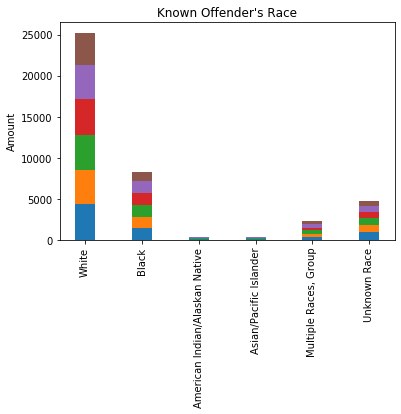

In [26]:
knownOffList = [known_offender2004,known_offender2005,known_offender2006,known_offender2007,known_offender2008,
               known_offender2009]

ind = np.arange(6)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
knownCombined = 0
p1 = plt.bar(ind, known_offender2004['Unnamed: 1'].iloc[1:].to_numpy().astype(int), width)
#plt.legend((p1[0]), ('2004','2005'))
for x in range(len(knownOffList)-1):
    current = knownOffList[x]['Unnamed: 1'].iloc[1:].to_numpy().astype(int)
    post = knownOffList[x+1]['Unnamed: 1'].iloc[1:].to_numpy().astype(int)
    knownCombined = knownCombined + current
    
    p2 = plt.bar(ind, post, width, bottom=knownCombined)
    #plt.legend((p2[0]), ('2004'))

plt.ylabel('Amount')
plt.title("Known Offender's Race")
plt.xticks(ind, known_offender2004['Table 9'].iloc[1:], rotation=90)
#plt.yticks(np.arange(0, max(knownCombined), int(max(knownCombined)*.1)))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()